<h1 style="color: blue; text-align:center;">LINEAR REGRESSION - Phoenix</h1>
<p>Predicting temperatures according to pollution gases</p>

<h3>1. Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>2. Reading the data</h3>

In [2]:
data = pd.read_csv("data/phoenix_data.csv")
data.head()

,Unnamed: 0,NO2,SO2,CO,O3,Temperature
0,2000,29.1213,2.3374,1.0097,0.0217,75.0
1,2001,28.8365,2.4740,0.8580,0.0200,75.9
2,2002,29.3263,2.5718,0.7849,0.0207,74.1
3,2003,29.3263,2.5718,0.7849,0.0207,75.1
4,2004,24.5730,2.2661,0.5619,0.0220,75.3


<h3>3. Analyzing the data</h3>

In [3]:
data.shape

(16, 6)

In [4]:
data.describe()

,Unnamed: 0,NO2,SO2,CO,O3,Temperature
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,22.471106,1.798575,0.601381,0.024288,75.487500
std,4.760952,4.645711,0.602895,0.182904,0.002560,0.837357
min,2000.000000,14.826600,0.825100,0.407600,0.020000,74.100000
25%,2003.750000,19.289050,1.240050,0.445325,0.021925,74.950000
50%,2007.500000,21.645350,1.873400,0.545050,0.025050,75.500000
75%,2011.250000,25.638875,2.349700,0.730750,0.025925,75.950000
max,2015.000000,29.326300,2.571800,1.009700,0.028100,77.400000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16 non-null     int64  
 1   NO2          16 non-null     float64
 2   SO2          16 non-null     float64
 3   CO           16 non-null     float64
 4   O3           16 non-null     float64
 5   Temperature  16 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 896.0 bytes


In [6]:
data.isna().sum()

Unnamed: 0     0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
dtype: int64

<h3>4. Cleaning the data</h3>

In [7]:
data = data.set_index("Unnamed: 0")
data.index.name = None
data

,NO2,SO2,CO,O3,Temperature
2000,29.1213,2.3374,1.0097,0.0217,75.0
2001,28.8365,2.4740,0.8580,0.0200,75.9
2002,29.3263,2.5718,0.7849,0.0207,74.1
2003,29.3263,2.5718,0.7849,0.0207,75.1
2004,24.5730,2.2661,0.5619,0.0220,75.3
2005,23.9535,2.3866,0.7127,0.0242,75.5
2006,22.4053,2.0039,0.6441,0.0257,75.5
2007,22.3958,1.8212,0.6205,0.0236,75.8
2008,20.8949,1.9256,0.5282,0.0254,74.8
2009,19.6189,1.6244,0.5155,0.0250,75.8


In [8]:
data.corr()

,NO2,SO2,CO,O3,Temperature
NO2,1.000000,0.928415,0.912903,-0.951405,-0.429781
SO2,0.928415,1.000000,0.856543,-0.892745,-0.444625
CO,0.912903,0.856543,1.000000,-0.836233,-0.300297
O3,-0.951405,-0.892745,-0.836233,1.000000,0.448973
Temperature,-0.429781,-0.444625,-0.300297,0.448973,1.000000


<h3>5. Checking relation between data</h3>

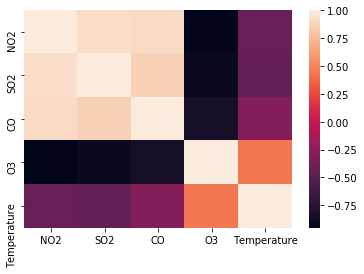

In [9]:
sns.heatmap(data.corr())

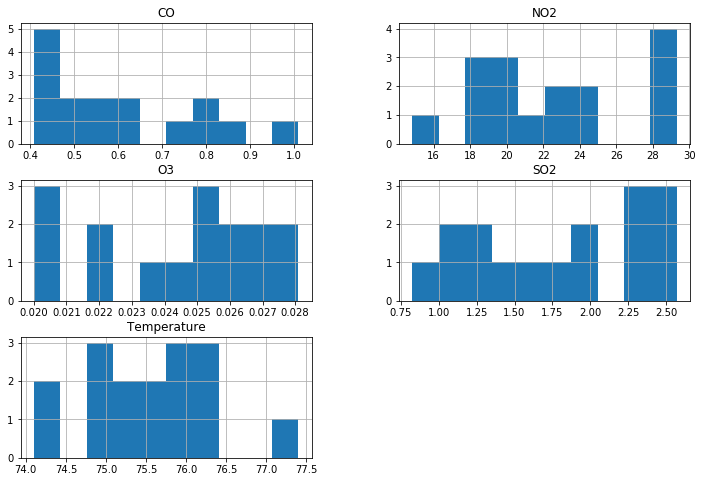

In [10]:
data[['NO2','SO2','CO','O3', 'Temperature']].hist(figsize=(12, 8))
plt.show()

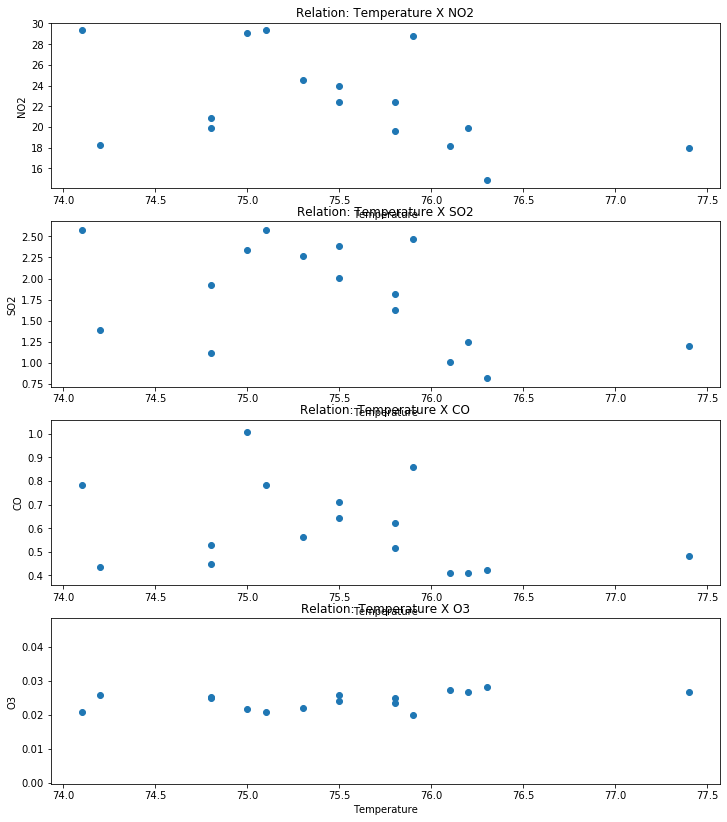

In [11]:
fig, axs = plt.subplots(4, figsize=(12,14))

axs[0].scatter(data['Temperature'], data['NO2'])
axs[0].set_title("Relation: Temperature X NO2")
axs[0].set_xlabel("Temperature")
axs[0].set_ylabel("NO2")

axs[1].scatter(data['Temperature'], data['SO2'])
axs[1].set_title("Relation: Temperature X SO2")
axs[1].set_xlabel("Temperature")
axs[1].set_ylabel("SO2")

axs[2].scatter(data['Temperature'], data['CO'])
axs[2].set_title("Relation: Temperature X CO")
axs[2].set_xlabel("Temperature")
axs[2].set_ylabel("CO")

axs[3].scatter(data['Temperature'], data['O3'])
axs[3].set_title("Relation: Temperature X O3")
axs[3].set_xlabel("Temperature")
axs[3].set_ylabel("O3")

plt.show()

<h3>6. Splitting the data</h3>

In [12]:
X = data[['NO2', 'CO', 'SO2', 'O3']].values
X

array([[2.91213e+01, 1.00970e+00, 2.33740e+00, 2.17000e-02],
       [2.88365e+01, 8.58000e-01, 2.47400e+00, 2.00000e-02],
       [2.93263e+01, 7.84900e-01, 2.57180e+00, 2.07000e-02],
       [2.93263e+01, 7.84900e-01, 2.57180e+00, 2.07000e-02],
       [2.45730e+01, 5.61900e-01, 2.26610e+00, 2.20000e-02],
       [2.39535e+01, 7.12700e-01, 2.38660e+00, 2.42000e-02],
       [2.24053e+01, 6.44100e-01, 2.00390e+00, 2.57000e-02],
       [2.23958e+01, 6.20500e-01, 1.82120e+00, 2.36000e-02],
       [2.08949e+01, 5.28200e-01, 1.92560e+00, 2.54000e-02],
       [1.96189e+01, 5.15500e-01, 1.62440e+00, 2.50000e-02],
       [1.82995e+01, 4.33400e-01, 1.38550e+00, 2.57000e-02],
       [1.98912e+01, 4.49300e-01, 1.11800e+00, 2.51000e-02],
       [1.99431e+01, 4.07600e-01, 1.25130e+00, 2.66000e-02],
       [1.81303e+01, 4.07600e-01, 1.00820e+00, 2.74000e-02],
       [1.79952e+01, 4.82400e-01, 1.20630e+00, 2.67000e-02],
       [1.48266e+01, 4.21400e-01, 8.25100e-01, 2.81000e-02]])

In [13]:
y = data['Temperature'].values
y

array([75. , 75.9, 74.1, 75.1, 75.3, 75.5, 75.5, 75.8, 74.8, 75.8, 74.2,
       74.8, 76.2, 76.1, 77.4, 76.3])

In [14]:
# Split the dataset using Scikit learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.20, random_state=15)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12, 4)
(4, 4)
(12,)
(4,)


<h3>7. Creating the Model</h3>

In [16]:
# Building your model using any of the algorithms, using Scikit learn library

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h3>8. Making Prediction</h3>

In [17]:
# Predict/Classify the model for test and training data sets

y_pred = model.predict(X_train)   
y_pred

array([75.48838491, 75.01661559, 76.21917856, 75.65221906, 75.99783389,
       75.66829056, 75.8113798 , 75.37224422, 75.91688421, 75.71544724,
       75.31480087, 75.32672109])

In [18]:
y_pred_test = model.predict(X_test)   
y_pred_test

array([74.65467557, 75.42785752, 74.88285371, 74.88285371])

In [19]:
# Evaluate the model. Compare train and test and evaluate model.

data_predicted = pd.DataFrame({'ACTUAL': y_train, 'PREDICTED': np.around(y_pred, decimals=1)})
data_predicted

,ACTUAL,PREDICTED
0,74.2,75.5
1,75.9,75.0
2,76.3,76.2
3,75.5,75.7
4,76.1,76.0
5,74.8,75.7
6,75.0,75.8
7,75.8,75.4
8,77.4,75.9
9,76.2,75.7


In [20]:
data_predicted_test = pd.DataFrame({'ACTUAL': y_test, 'PREDICTED': np.around(y_pred_test, decimals=1)})
data_predicted_test

,ACTUAL,PREDICTED
0,75.3,74.7
1,75.8,75.4
2,75.1,74.9
3,74.1,74.9


<h3>9. Showing Results</h3>

In [21]:
# Provide comparative results, like Accuracy, Score. 

model.score(X_train, y_train)

0.15597368526741218

In [22]:
model.score(X_test, y_test)

0.20461793929059094

In [23]:
y_train_round = np.around(y_train, 0)
y_pred_round = np.around(y_pred, 0)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train_round, y_pred_round)

0.4166666666666667

In [25]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(model, X_train, y_train)
scores_train

array([ -4.3651307 ,  -1.60652245, -47.55769551,  -5.09468932,
        -1.66795036])

In [26]:
list(zip(['NO2', 'CO', 'SO2', 'O3'], model.coef_))

[('NO2', 0.02256982868991369),
 ('CO', 2.5905363675576623),
 ('SO2', -0.7675599371912478),
 ('O3', 170.88427317107414)]

In [27]:
model.intercept_

70.6243583441717

In [28]:
# Use the Scikit Learn to call functions r2_score, Mean Squared Error for train and testdata set.

from sklearn.metrics import r2_score

r2_score(y_train, y_pred)

0.15597368526741218

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_train)

0.568486890735513

In [30]:
# Design and explain your Confusion matrix. Also infer if your model is overfitting or underfitting.

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_round, y_pred_round)

array([[0, 1, 0, 0],
       [0, 1, 2, 0],
       [0, 3, 4, 0],
       [0, 0, 1, 0]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_train_round, y_pred_round))

              precision    recall  f1-score   support

        74.0       0.00      0.00      0.00         1
        75.0       0.20      0.33      0.25         3
        76.0       0.57      0.57      0.57         7
        77.0       0.00      0.00      0.00         1

    accuracy                           0.42        12
   macro avg       0.19      0.23      0.21        12
weighted avg       0.38      0.42      0.40        12

